In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Load dataset
df = pd.read_csv('/Users/dhruvpai/Downloads/practicals/CC GENERAL.csv')  # Change this to your actual path

In [38]:
# Data Cleaning and Preprocessing
# Remove non-numeric columns (if any) and handle missing values
df = df.select_dtypes(include=[np.number]).dropna()

In [39]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

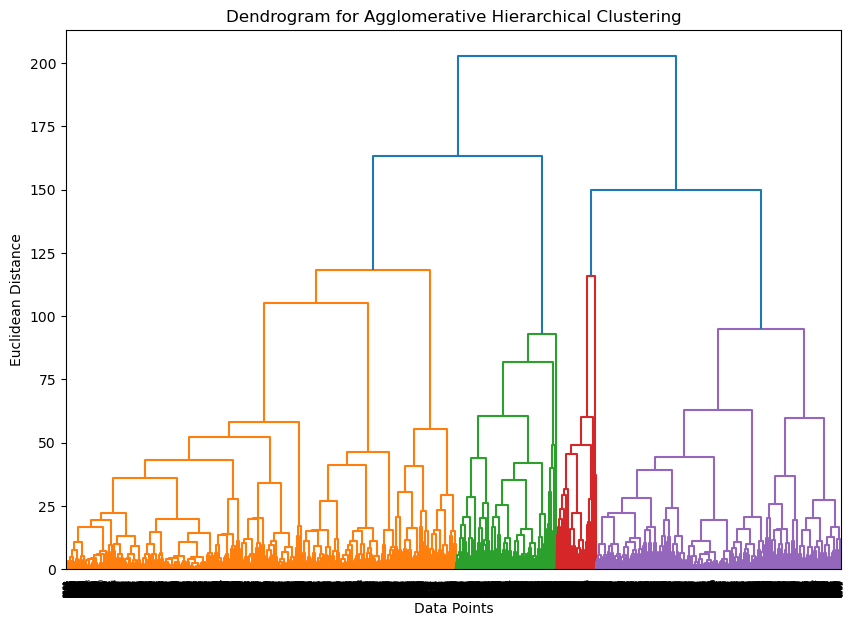

In [40]:
# Create a dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 7))
linked = linkage(scaled_data, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Agglomerative Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [41]:
# Apply Agglomerative Clustering
# Set number of clusters based on dendrogram (e.g., 3 clusters)
model = AgglomerativeClustering(n_clusters=7, linkage="average", metric="cosine")
cluster_labels = model.fit_predict(scaled_data)

In [42]:
# Append cluster labels to original data
df['Cluster'] = cluster_labels

In [43]:
from sklearn.decomposition import PCA
# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(scaled_data)

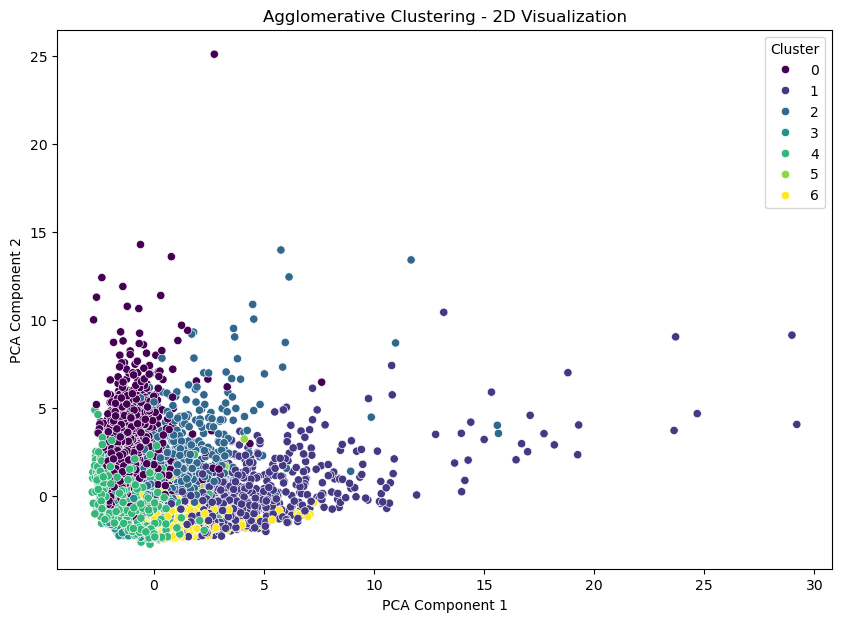

In [44]:
# Plotting clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=cluster_labels, palette='viridis')
plt.title("Agglomerative Clustering - 2D Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
# Calculate cosine similarity
similarity_matrix = cosine_similarity(scaled_data)

# Set a sparsity level: keep only top-k connections per row
k = 10  # adjust this number based on dataset size for optimal sparsity
for i in range(similarity_matrix.shape[0]):
    top_k_indices = np.argsort(similarity_matrix[i])[-k:]
    similarity_matrix[i, :] = 0  # Set all to zero
    similarity_matrix[i, top_k_indices] = similarity_matrix[i, top_k_indices]

# Convert to graph and apply PageRank
G = nx.from_numpy_array(similarity_matrix)
page_rank = nx.pagerank(G, alpha=0.85)

In [46]:
# Add PageRank scores to DataFrame for analysis
df['PageRank'] = df.index.map(page_rank)
print("Top 5 Points based on PageRank Scores:")
print(df[['PageRank', 'Cluster']].sort_values(by='PageRank', ascending=False).head())

Top 5 Points based on PageRank Scores:
      PageRank  Cluster
0     0.000116        0
5754  0.000116        0
5752  0.000116        4
5751  0.000116        2
5750  0.000116        0


In [47]:
def random_walk(graph, start_node, steps=10):
    path = [start_node]
    for _ in range(steps):
        neighbors = list(graph.neighbors(start_node))
        if not neighbors:  # If no neighbors, stop the walk
            break
        next_node = random.choice(neighbors)
        path.append(next_node)
        start_node = next_node
    return path

In [48]:
# Perform a random walk from a randomly chosen starting point
start_node = random.choice(list(G.nodes))
path = random_walk(G, start_node, steps=15)
print("Random Walk Path:", path)

Random Walk Path: [1423]


In [53]:
# Set a range for the number of clusters
cluster_range = range(2, 8)

In [54]:
# Store silhouette scores for each number of clusters
silhouette_scores = []

In [56]:
# Compute silhouette scores for each number of clusters (multiple runs for each)
for n_clusters in cluster_range:
    cluster_scores = []  # Store the silhouette scores for each run
    for _ in range(5):  # Run multiple times for each number of clusters
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', metric='cosine')
        model.fit(scaled_data)
        score = silhouette_score(scaled_data, model.labels_, metric='cosine')
        cluster_scores.append(score)
    silhouette_scores.append(cluster_scores)  # Store the list of scores for each n_clusters

In [70]:
# Assuming silhouette_scores is a list of lists, where each sublist contains the scores for a specific n_clusters
avg_silhouette_scores = [np.mean(scores) for scores in silhouette_scores]  # Average score for each n_clusters
x_labels = [f'Cluster {n}' for n in cluster_range]  # Labels for the cluster sizes

In [74]:
# Example of how you might flatten the silhouette scores and prepare labels
flattened_scores = [score for sublist in silhouette_scores for score in sublist]
x_labels = ['Cluster ' + str(n) for n in cluster_range for _ in range(10)]  # Example x-labels for 10 runs


In [75]:
# Create an array for the x-axis (number of clusters) corresponding to each score
x_labels = np.tile(cluster_range, len(silhouette_scores[0]))  # Repeat cluster range to match the number of runs

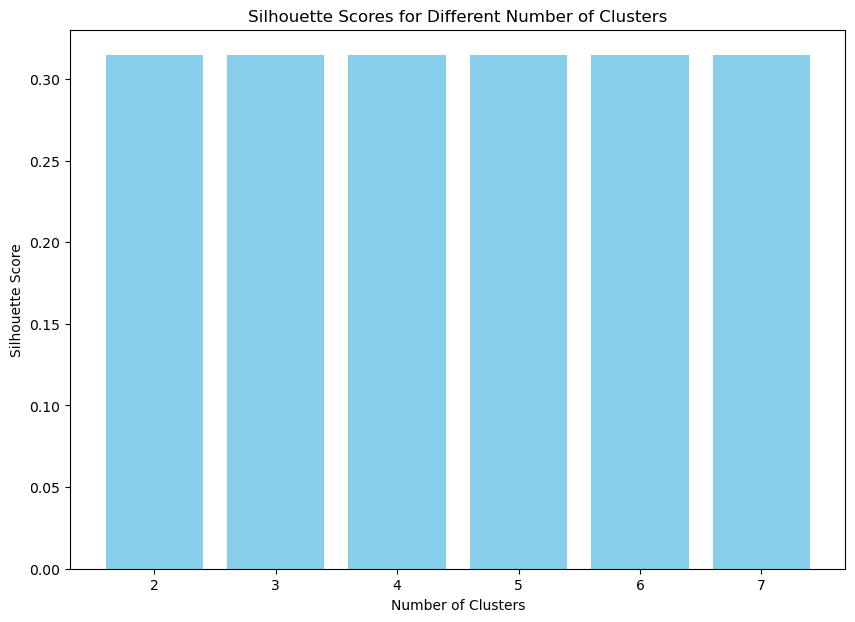

In [76]:
# Now plot using matplotlib's barplot
plt.figure(figsize=(10, 7))
plt.bar(x_labels, flattened_scores, color='skyblue')

# Customize the plot
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)  # Show each cluster number on the x-axis
plt.show()

Agglomerative Hierarchical Clustering Implementation:
Load the dataset and preprocess it.
Apply Agglomerative Hierarchical Clustering and visualize the results.

Page Ranking Algorithm:
Implement the PageRank algorithm to evaluate and rank clusters.

Random Walk Study:
Use a random walk process on the clustered data to analyze convergence or stability within clusters.

STEPS :
- Loading the Dataset and Preprocessing
- Agglomerative Hierarchical Clustering
- Visualize the Clusters
- Implementing the PageRank Algorithm
- Analyzing with Random Walk

1. Data Loading and Cleaning
Here, the code loads the dataset (CC GENERAL.csv) using pandas. It then selects only the numerical columns from the dataset and drops rows with missing values using .dropna(). This ensures that the dataset is clean and ready for clustering.

2. Data Standardization
Standardization is done using StandardScaler, which scales each feature to have zero mean and unit variance. This is crucial in clustering, especially when using distance-based metrics like cosine similarity, as it prevents features with larger ranges from dominating the distance calculations.

3. Dendrogram Visualization (Hierarchical Clustering)
A dendrogram is a tree-like diagram used to represent hierarchical clustering results. Here, the code uses the linkage function to compute the linkage matrix, which contains information about how the data points are clustered. The dendrogram function is then used to create a plot showing the hierarchical structure of the clusters. This step helps in visually deciding how many clusters to choose.

4. Agglomerative Clustering
The AgglomerativeClustering algorithm is used to perform the actual clustering. The model is set with 7 clusters (n_clusters=7), average linkage (which measures the distance between clusters based on the average pairwise distance of all points in the two clusters), and cosine as the distance metric. The model is then applied to the standardized data, and the cluster labels are predicted.

5. PCA for Dimensionality Reduction
To visualize the clustering results in 2D, PCA (Principal Component Analysis) is used. PCA reduces the data from its original high-dimensional space to just two dimensions while retaining as much variance as possible. This is useful for visualizing how well the clusters are separated in a lower-dimensional space.

6. Clustering Visualization
After applying PCA, a scatter plot is generated to visualize the data points in the 2D space. The points are colored based on their cluster labels, allowing us to visually assess how well the clusters are separated.

7. Cosine Similarity and PageRank Calculation
The code calculates the cosine similarity matrix between all data points. This matrix represents how similar each pair of data points is to each other, with 1 being identical and 0 being completely dissimilar. The similarity matrix is then sparsified by keeping only the top k (10 in this case) most similar points for each data point.

The sparsified similarity matrix is converted into a graph using networkx. The PageRank algorithm is applied to the graph to calculate the importance of each data point based on its connections in the graph. The PageRank scores are then added to the original DataFrame, and the top 5 data points with the highest PageRank scores are printed.

8. Random Walk Simulation
The code simulates a random walk starting from a randomly selected node in the graph. A random walk involves moving through the graph from one node to another by randomly selecting a neighbor at each step. This walk is repeated for a specified number of steps (15 in this case). The path taken during the random walk is printed to the console.

9. Silhouette Score Calculation for Different Numbers of Clusters
A range of cluster numbers is defined (2 to 7 clusters), and the silhouette scores are computed for each number of clusters. The silhouette score measures how well each data point fits within its assigned cluster, with higher values indicating better clustering. For each number of clusters, the agglomerative clustering is run multiple times (5 times in this case), and the silhouette score is calculated for each run.

These scores are stored in a list (silhouette_scores), which is later used to visualize the clustering performance for different numbers of clusters.

10. Visualization of Silhouette Scores
The silhouette scores for different cluster sizes (e.g., 2 to 7 clusters) are visualized using a bar plot. Each bar represents the average silhouette score for a particular number of clusters, allowing you to visually assess the clustering performance for each number of clusters. This helps in selecting the optimal number of clusters based on the highest silhouette score.

Questions : 
----

1. What is meant by the Agglomerative Hierarchical Clustering algorithm?
Agglomerative Hierarchical Clustering is a bottom-up clustering technique. It starts by treating each data point as an individual cluster, and then iteratively merges the closest clusters based on a certain distance metric. The process continues until all data points belong to a single cluster or until a specified number of clusters is achieved. This method generates a hierarchy of clusters, which can be visualized using a dendrogram. The main advantage of this algorithm is that it doesn't require the number of clusters to be pre-specified, and it can capture hierarchical relationships in the data.

2. Which is the ready-made function available to build Agglomerative Hierarchical Clustering?
In Python, the AgglomerativeClustering class from the sklearn.cluster module is used to perform agglomerative hierarchical clustering. This function allows you to specify the number of clusters you want, the distance metric to use, and the linkage method (such as "ward", "average", or "complete").
- Example usage:  
- from sklearn.cluster import AgglomerativeClustering
- model = AgglomerativeClustering(n_clusters=3, linkage='ward')

3. Tell me the steps to implement the Agglomerative Hierarchical Clustering algorithm.
To implement Agglomerative Hierarchical Clustering, follow these general steps:

Prepare the Data:Load and clean your dataset (remove missing values, handle categorical data, etc.). Standardize the data if necessary (e.g., using StandardScaler for feature scaling).

Calculate Pairwise Distances: Start by computing the pairwise distances between all the data points. The distance metric can be Euclidean, cosine, or others depending on the problem.

Create a Distance Matrix: Build a distance matrix that shows how far apart each pair of data points is.

Merge Clusters: Initially, treat each data point as its own cluster. Identify the two clusters that are closest (based on the distance matrix) and merge them into a single cluster. Repeat this process, at each step merging the closest clusters, until the desired number of clusters is achieved or all points belong to one cluster.

Visualize the Dendrogram (optional): Use a dendrogram to visualize the hierarchy of clusters and help decide how many clusters to choose.

Choose the Number of Clusters: If you have a specific number of clusters in mind, specify it when you initialize the model. Alternatively, you can use the dendrogram to find the optimal number of clusters based on the visual structure.

Assign Cluster Labels: Once the clustering is done, you can assign cluster labels to each data point using the labels_ attribute.

4. Applications of Agglomerative Hierarchical Clustering algorithm:
Agglomerative Hierarchical Clustering can be used in a variety of applications, including but not limited to:

- Customer Segmentation: In marketing, hierarchical clustering is used to segment customers based on their purchasing behavior, demographics, or browsing patterns.
Document or Text Clustering: Hierarchical clustering is applied to group similar documents or texts together based on their content. This is useful in natural language processing tasks like topic modeling or organizing large datasets of text.
- Image Segmentation: It can be used in image processing to group similar pixels together. This is useful for tasks like object detection or image compression.
- Biological Data Analysis: In bioinformatics, hierarchical clustering is used to group genes or proteins with similar expression patterns, helping in gene function prediction or identifying patterns in biological experiments.
- Anomaly Detection: By analyzing the structure of clusters, outliers or anomalies can be detected as data points that do not fit into any cluster well.
- Hierarchical Organization of Data: For any dataset where natural hierarchical relationships exist (e.g., taxonomies), agglomerative hierarchical clustering helps uncover those relationships, providing valuable insights for further analysis.





